# Analise do mercado do crédito
## Estudo realizado com as aulas do curso de análise de conjuntura com python e R da Analise macro:
    https://analisemacro.com.br/curso/analise-de-conjuntura-usando-python/

## Instalando X13 Arima seats usado para fazer o ajuste sazonal dos dados do mercado de crédito
### Executar somente se não tiver o X13 previamente instalado

In [33]:
#import requests
#import zipfile
#import os
#
#
## URL do arquivo ZIP
#url = 'https://www2.census.gov/software/x-13arima-seats/x13as/windows/program-archives/x13as_ascii-v1-1-b59.zip'
#
## Nome do arquivo ZIP local
#nome_arquivo_zip = 'x13as_ascii-v1-1-b59.zip'
#
## Baixar o arquivo ZIP
#r = requests.get(url)
#with open(nome_arquivo_zip, 'wb') as f:
#    f.write(r.content)
#
## Extrair o conteúdo do arquivo ZIP
#with zipfile.ZipFile(nome_arquivo_zip, 'r') as zip_ref:
#    zip_ref.extractall()
#
#os.remove(nome_arquivo_zip)

## Instalando bibliotecas necessárias

In [34]:
# Importa módulos
import pandas as pd
import sidrapy as sidra
from bcb import sgs
from statsmodels.tsa import x13
import os
os.environ['X13PATH'] = 'x13as/'
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")


# Coletando dados de crédito do SGS do bacen

In [35]:
# Base de códigos acessados no SGS
# https://www3.bcb.gov.br/sgspub/localizarseries/localizarSeries.do?method=prepararTelaLocalizarSeries
codigos = {
  'Concessões de crédito - Total': 20631,
  'Concessões de crédito - PJ': 20632,
  'Concessões de crédito - PF': 20633,
  'Concessões de crédito - Livre': 20634,
  'Concessões de crédito - Direcionado': 20685,
  'Saldo da carteira de crédito - Total': 20539,
  'PIB acumulado dos últimos 12 meses': 4382,
  'Saldos de crédito - Privado': 2043,
  'Saldos de crédito - Público': 2007,
  'Taxa média de juros das operações de crédito': 20714,
  'Spread médio das operações de crédito': 20783,
  'Inadimplência da carteira de crédito': 21082
}

# Importa dados do SGS/BCB
dados = sgs.get(codes = codigos, start = '2000-01-01')
# Trata dados do SGS
dados.rename_axis('data', inplace = True)
dados.dropna(inplace=True)
dados

,Concessões de crédito - Total,Concessões de crédito - PJ,Concessões de crédito - PF,Concessões de crédito - Livre,Concessões de crédito - Direcionado,Saldo da carteira de crédito - Total,PIB acumulado dos últimos 12 meses,Saldos de crédito - Privado,Saldos de crédito - Público,Taxa média de juros das operações de crédito,Spread médio das operações de crédito,Inadimplência da carteira de crédito
data,,,,,,,,,,,,
2011-03-01,215654.0,125022.0,90632.0,192480.0,23174.0,1759678,4015980.3,1021656,738023,27.35,17.65,3.17
2011-04-01,203722.0,117618.0,86104.0,181292.0,22430.0,1783487,4058947.1,1036782,746706,27.94,18.22,3.24
2011-05-01,227829.0,129405.0,98424.0,202150.0,25679.0,1812128,4111272.3,1055711,756417,27.86,18.14,3.37
2011-06-01,229876.0,132130.0,97746.0,200623.0,29253.0,1840157,4158547.4,1068709,771448,27.62,17.95,3.32
2011-07-01,222347.0,126754.0,95593.0,193708.0,28639.0,1861598,4196989.2,1078375,783223,27.81,17.94,3.42
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-10-01,542505.0,229326.0,313180.0,472216.0,70289.0,5636980,10726297.6,3198565,2438415,29.67,20.34,3.47
2023-11-01,553535.0,236000.0,317535.0,494771.0,58764.0,5702268,10794706.1,3245946,2456322,29.16,20.10,3.43
2023-12-01,598378.0,287189.0,311188.0,537091.0,61287.0,5794912,10856112.3,3312667,2482245,28.34,19.67,3.20


# Coleta e tratamento dados do IPCA do SIDRA IBGE

In [36]:
ipca = sidra.get_table(
    table_code = '1737', 
    territorial_level = '1', 
    ibge_territorial_code = 'all', 
    variable = '2266', 
    period = 'all'
    )

In [37]:
ipca

,NC,NN,MC,MN,V,D1C,D1N,D2C,D2N,D3C,D3N
0,Nível Territorial (Código),Nível Territorial,Unidade de Medida (Código),Unidade de Medida,Valor,Brasil (Código),Brasil,Mês (Código),Mês,Variável (Código),Variável
1,1,Brasil,30,Número-índice,0.0000000076183,1,Brasil,197912,dezembro 1979,2266,IPCA - Número-índice (base: dezembro de 1993 =...
2,1,Brasil,30,Número-índice,0.0000000081223,1,Brasil,198001,janeiro 1980,2266,IPCA - Número-índice (base: dezembro de 1993 =...
3,1,Brasil,30,Número-índice,0.0000000084973,1,Brasil,198002,fevereiro 1980,2266,IPCA - Número-índice (base: dezembro de 1993 =...
4,1,Brasil,30,Número-índice,0.0000000090104,1,Brasil,198003,março 1980,2266,IPCA - Número-índice (base: dezembro de 1993 =...
...,...,...,...,...,...,...,...,...,...,...,...
528,1,Brasil,30,Número-índice,6735.5500000000000,1,Brasil,202311,novembro 2023,2266,IPCA - Número-índice (base: dezembro de 1993 =...
529,1,Brasil,30,Número-índice,6773.2700000000000,1,Brasil,202312,dezembro 2023,2266,IPCA - Número-índice (base: dezembro de 1993 =...
530,1,Brasil,30,Número-índice,6801.7200000000000,1,Brasil,202401,janeiro 2024,2266,IPCA - Número-índice (base: dezembro de 1993 =...
531,1,Brasil,30,Número-índice,6858.1700000000000,1,Brasil,202402,fevereiro 2024,2266,IPCA - Número-índice (base: dezembro de 1993 =...


In [38]:
# Importa dados do IPCA do IBGE
# https://sidra.ibge.gov.br/tabela/1737
ipca = sidra.get_table(
    table_code = '1737', 
    territorial_level = '1', 
    ibge_territorial_code = 'all', 
    variable = '2266', 
    period = 'all'
    )
# Trata dados do IPCA
ipca = (
    ipca
    .rename(columns = ipca.iloc[0])
    .rename(columns = {'Mês (Código)': 'data', 'Valor': 'ipca'})
    .query('ipca not in "Valor"')
    .filter(items = ['data', 'ipca'], axis = 'columns')
    .assign(
        data = lambda x: pd.to_datetime(x.data, format = '%Y%m'),
        ipca = lambda y: y.ipca.astype(float)
        )
    .set_index('data')
)
ipca

,ipca
data,
1979-12-01,7.618300e-09
1980-01-01,8.122300e-09
1980-02-01,8.497300e-09
1980-03-01,9.010400e-09
1980-04-01,9.486700e-09
...,...
2023-11-01,6.735550e+03
2023-12-01,6.773270e+03
2024-01-01,6.801720e+03


# Gráficos das Concessões

## Ajustando estilo dos gráficos 

In [39]:
import matplotlib.dates as mdt
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['axes.labelsize'] = 14 
plt.rcParams['axes.labelcolor'] = 'w'
plt.rcParams['figure.facecolor'] = 'black'
plt.rcParams['axes.facecolor'] = 'gray'
plt.rcParams['xtick.color'] = 'w'
plt.rcParams['ytick.color'] = 'w'
plt.rcParams['grid.color'] = 'black'
plt.rcParams['grid.linestyle'] = ':'
plt.rcParams['grid.linewidth'] = 0.5 
plt.rcParams['axes.autolimit_mode'] = 'data'
plt.rcParams['axes.axisbelow'] = True
plt.rcParams['text.color'] = 'w'

## Gerando gráficos

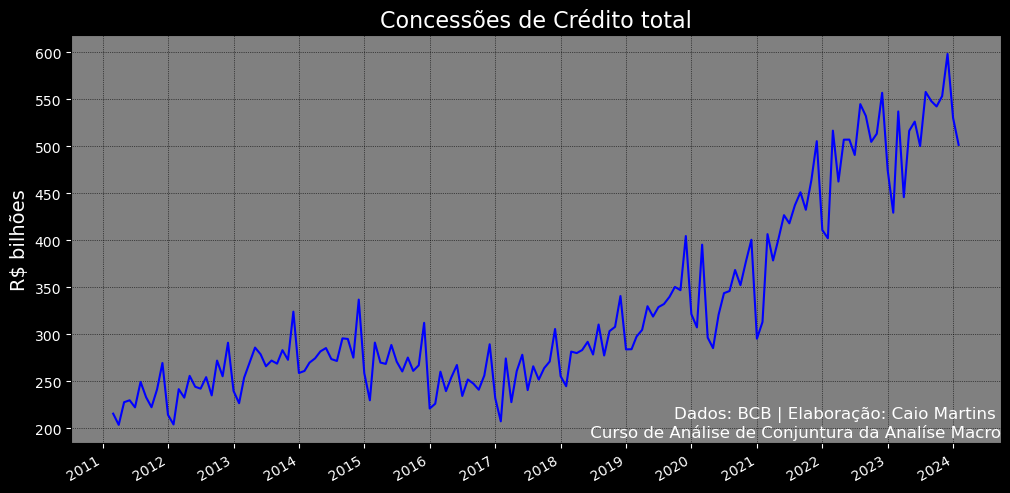

In [40]:
# Total - Nominal
fonte = 'Dados: BCB | Elaboração: Caio Martins \n Curso de Análise de Conjuntura da Analíse Macro'

plt.figure(figsize = (12,6))
ax = plt.subplot()
ax.plot(dados.index,dados['Concessões de crédito - Total'] / 1000,color = 'b')
ax.set_ylabel('R$ bilhões')
ax.set_title('Concessões de Crédito total')
ax.grid(True)
plt.figtext(0.9, 0.21, fonte, 
            horizontalalignment='right', fontsize=12)
plt.gca().xaxis.set_major_formatter(mdt.DateFormatter('%Y'))
plt.gca().xaxis.set_major_locator(mdt.YearLocator())
plt.gcf().autofmt_xdate()

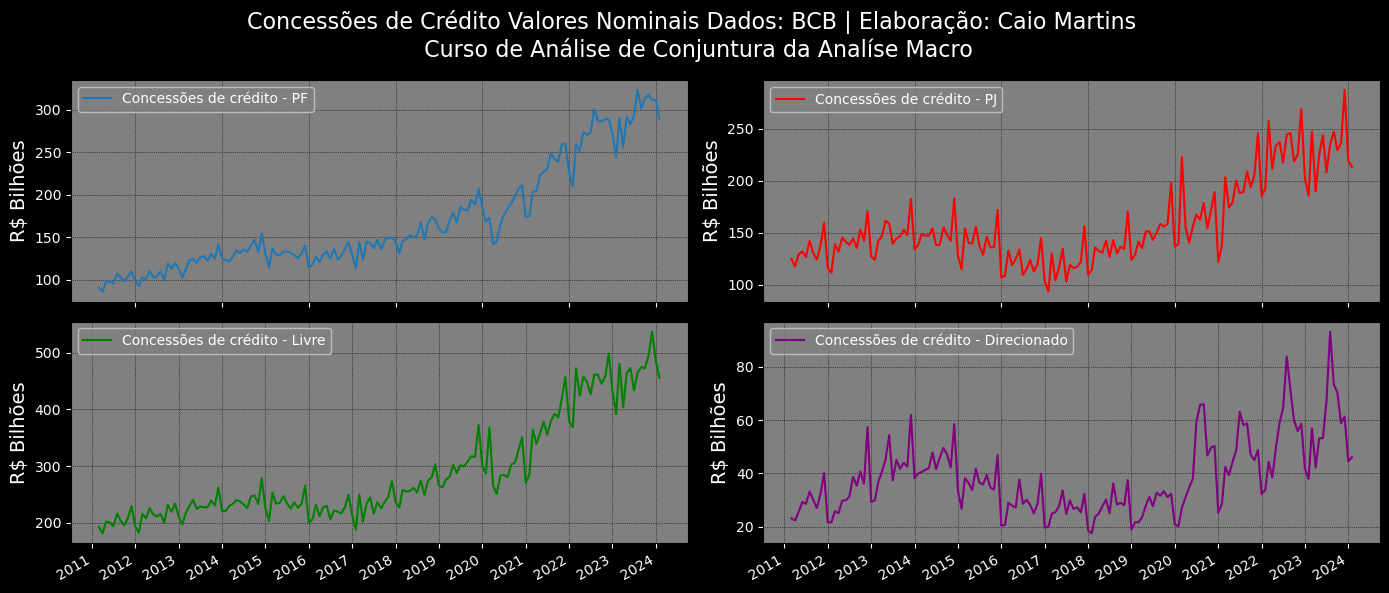

In [41]:
series = ['Concessões de crédito - PF', 'Concessões de crédito - PJ',
           'Concessões de crédito - Livre', 'Concessões de crédito - Direcionado']

plt.subplots(figsize=(14,6),sharex=True)

plt.subplot(221)
plt.plot(dados.index,dados[series[0]]/1000, label=series[0])
plt.ylabel('R$ Bilhões')
plt.legend()
plt.grid(True)

plt.subplot(222)
plt.plot(dados.index,dados[series[1]]/1000,color='r', label=series[1])
plt.ylabel('R$ Bilhões')
plt.legend()
plt.grid(True)


plt.subplot(223)
plt.plot(dados.index,dados[series[2]]/1000,color='g', label=series[2])
plt.ylabel('R$ Bilhões')
plt.gca().xaxis.set_major_formatter(mdt.DateFormatter('%Y'))
plt.gca().xaxis.set_major_locator(mdt.YearLocator())
plt.gcf().autofmt_xdate()
plt.legend()
plt.grid(True)

plt.subplot(224)
plt.plot(dados.index,dados[series[3]]/1000,color='purple', label=series[3])
plt.ylabel('R$ Bilhões')
plt.gca().xaxis.set_major_formatter(mdt.DateFormatter('%Y'))
plt.gca().xaxis.set_major_locator(mdt.YearLocator())
plt.gcf().autofmt_xdate()
plt.legend()
plt.grid(True)

plt.suptitle('Concessões de Crédito Valores Nominais ' + fonte, size=16)
plt.subplots_adjust(hspace=0.45)  # Ajusta o espaço vertical entre os subplots
plt.tight_layout()  # Ajusta automaticamente os subplots para evitar sobreposições
plt.savefig('Concessões de  crédito nominais.png')
plt.show()



## Gerando gráfico de concessões totais deflacionado e dessazonalizado

Os dados foram deflacionados utilizando o número índice da inflação coletado anteriormente do Sidra IBGE.

Seguindo a seguinte fórmula:<br>
$V_{ri:j} = \left( \frac{I_j}{I_i} \right) \times V_i$

Sendo:<br>
-  $V_{ri:j}$  o Valor real<br>
-  ${I_j}$  o índice de preços fixado<br>
-  ${I_i}$  o índice de preços no período<br>
-  ${V_i}$  o valor nominal


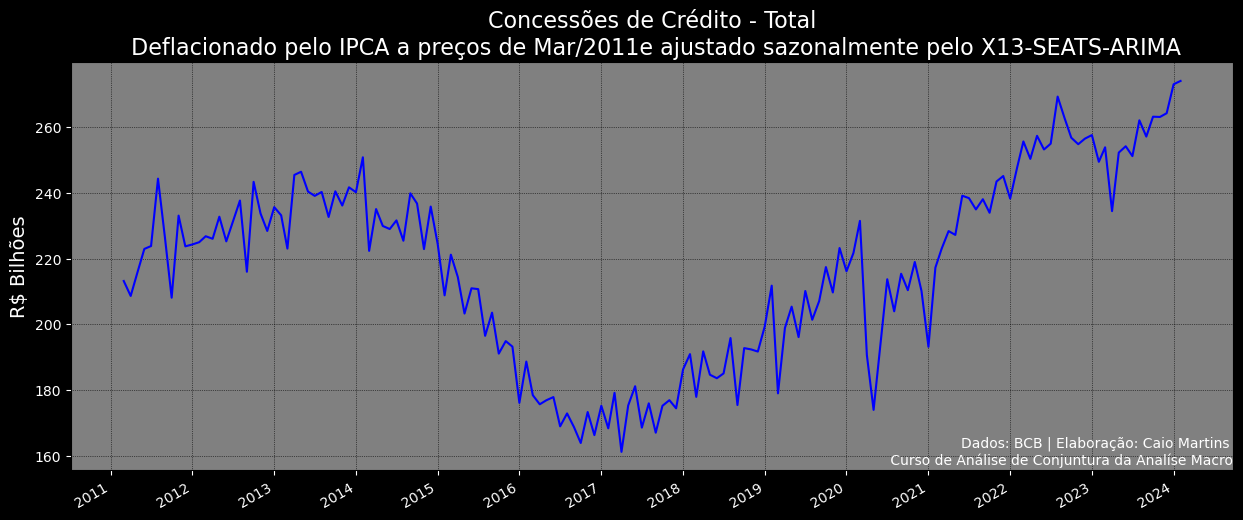

In [42]:
concessoes = (
    pd.merge(
        left = dados['Concessões de crédito - Total'],
        right = ipca,
        on = 'data'
        )
    .assign(
        deflacionado = lambda x: (x.ipca.iloc[0] / x.ipca * x['Concessões de crédito - Total']),
        ajuste = lambda x: x13.x13_arima_analysis(endog = x.deflacionado / 1000, prefer_x13 = True, freq = 12).seasadj
    )
)

plt.figure(figsize=(15,6))
plt.plot(concessoes.index,concessoes.ajuste,color='b')
plt.title('Concessões de Crédito - Total\n Deflacionado pelo IPCA a preços de ' + 
    concessoes.head(1).index.strftime('%b/%Y').item() + 
    'e ajustado sazonalmente pelo X13-SEATS-ARIMA')
plt.ylabel('R$ Bilhões')
plt.grid(True)
plt.figtext(0.9, 0.21, fonte, 
            horizontalalignment='right', fontsize=10)

plt.gca().xaxis.set_major_locator(mdt.YearLocator())
plt.gcf().autofmt_xdate()


### Estoque

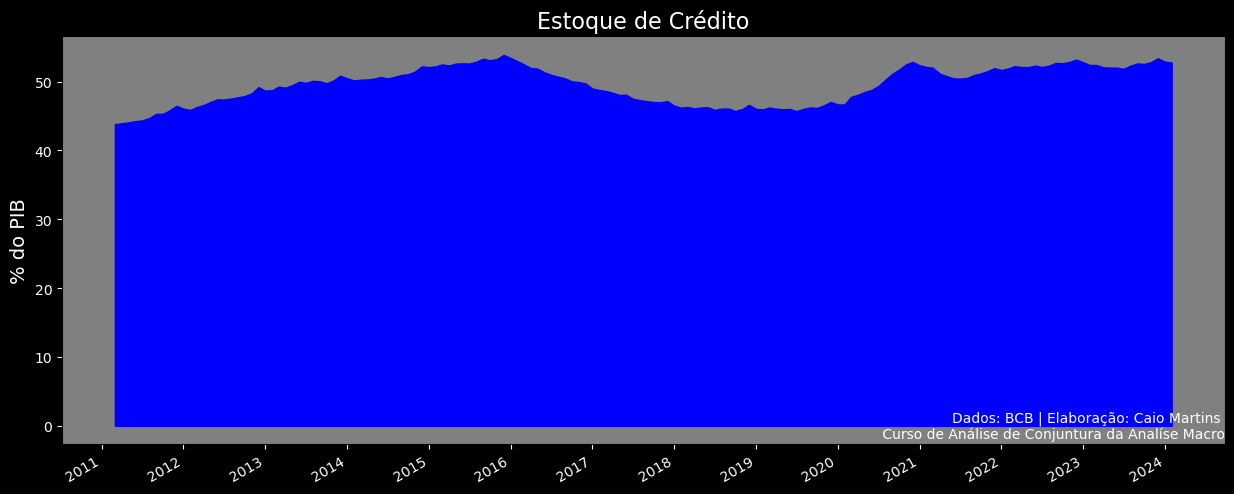

In [43]:
plt.figure(figsize=(15,6))
plt.fill_between(dados.index, 0, dados["Saldo da carteira de crédito - Total"] / dados["PIB acumulado dos últimos 12 meses"] * 100, color='b')
plt.title('Estoque de Crédito')
plt.ylabel("% do PIB")
plt.figtext(0.9, 0.21, fonte, 
            horizontalalignment='right', fontsize=10)

plt.gca().xaxis.set_major_locator(mdt.YearLocator())
plt.gcf().autofmt_xdate()

<Axes: title={'center': 'Estoque de Crédito\nDados: BCB | Elaboração: Caio Martins \n Curso de Análise de Conjuntura da Analíse Macro'}, ylabel='% do Total'>

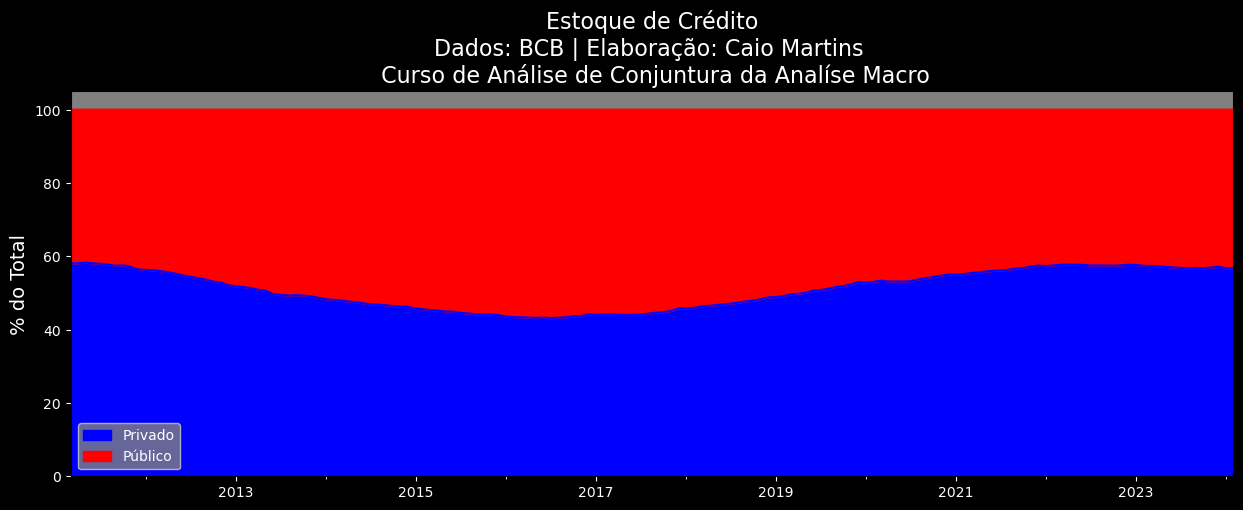

In [44]:
(
    dados
    .assign(
        Privado = lambda x: x["Saldos de crédito - Privado"] / x["Saldo da carteira de crédito - Total"] * 100,
        Público = lambda x: x["Saldos de crédito - Público"] / x["Saldo da carteira de crédito - Total"] * 100
        )
    .filter(items = ["Privado", "Público"], axis = "columns")
    .plot(
        title = "Estoque de Crédito\n" + fonte, 
        xlabel = "",
        ylabel = "% do Total", 
        figsize = (15, 5),
        kind = "area",
        color = ['blue', 'r']
        )
)

### Taxa de juros

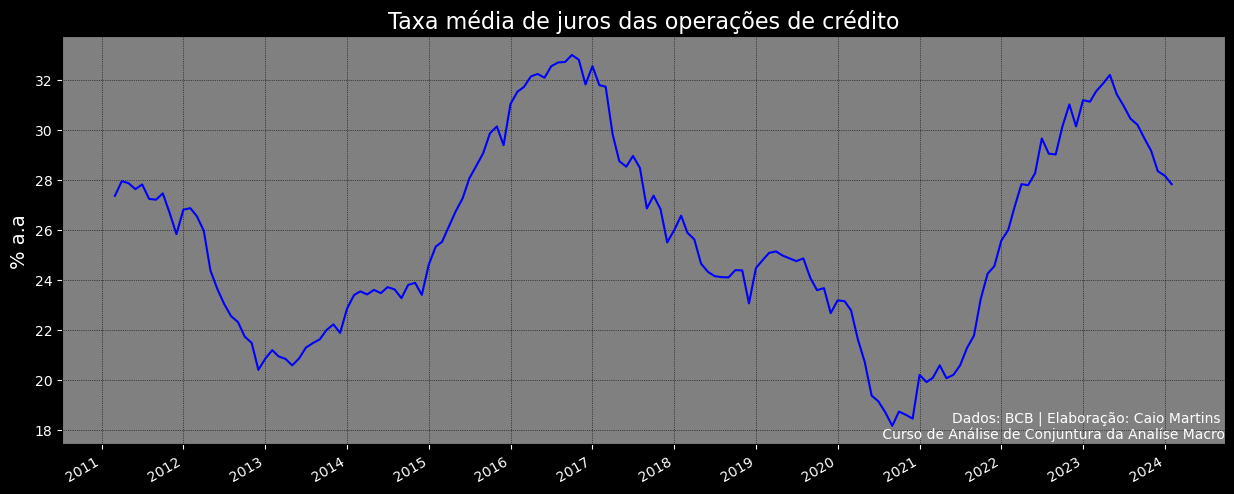

In [45]:
plt.figure(figsize=(15,6))
plt.plot(dados["Taxa média de juros das operações de crédito"],color='b')
plt.title('Taxa média de juros das operações de crédito')
plt.ylabel("% a.a")
plt.grid(True)
plt.figtext(0.9, 0.21, fonte, 
            horizontalalignment='right', fontsize=10)

plt.gca().xaxis.set_major_locator(mdt.YearLocator())
plt.gcf().autofmt_xdate()

### Spread

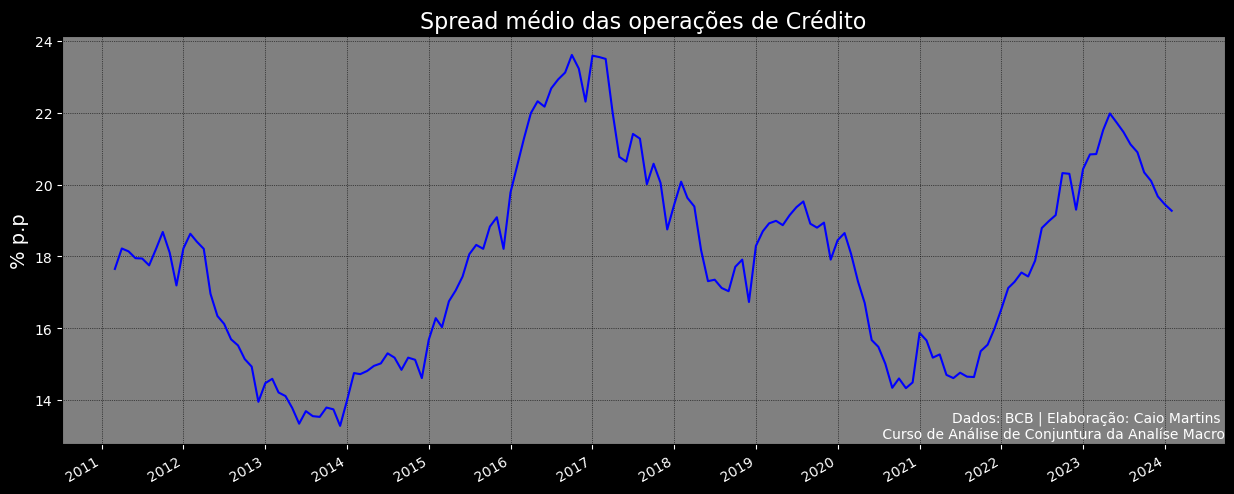

In [46]:
plt.figure(figsize=(15,6))
plt.plot(dados['Spread médio das operações de crédito'],color='b')
plt.title('Spread médio das operações de Crédito')
plt.ylabel("% p.p")
plt.grid(True)
plt.figtext(0.9, 0.21, fonte, 
            horizontalalignment='right', fontsize=10)

plt.gca().xaxis.set_major_locator(mdt.YearLocator())
plt.gcf().autofmt_xdate()

### Inadimplência

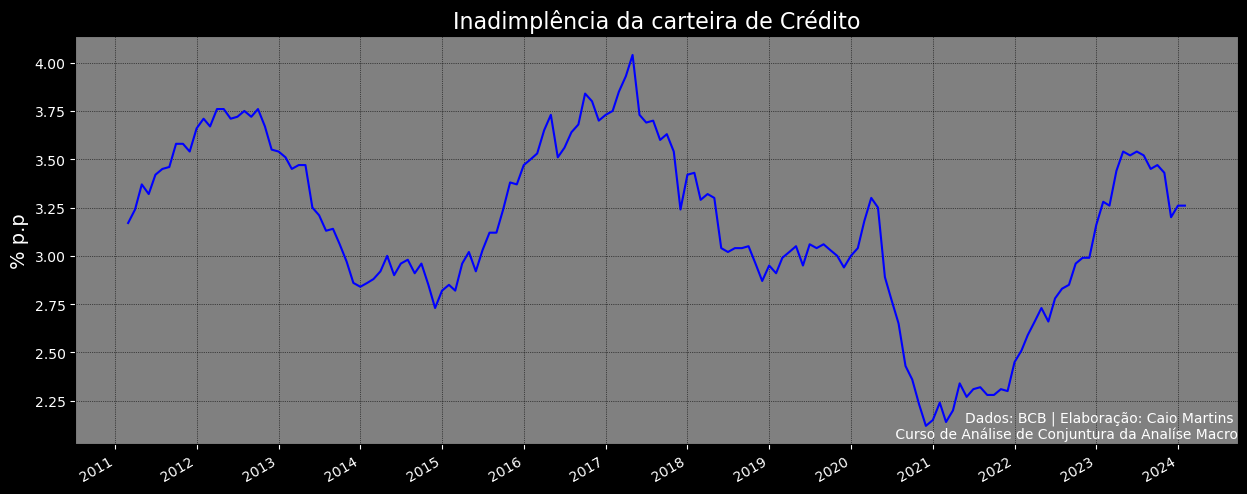

In [47]:
plt.figure(figsize=(15,6))
plt.plot(dados['Inadimplência da carteira de crédito'],color='b')
plt.title('Inadimplência da carteira de Crédito')
plt.ylabel("% p.p")
plt.grid(True)
plt.figtext(0.9, 0.21, fonte, 
            horizontalalignment='right', fontsize=10)

plt.gca().xaxis.set_major_locator(mdt.YearLocator())
plt.gcf().autofmt_xdate()